In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
import os
import re
import wfdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'wfdb'

In [15]:
import os
import ast
import wfdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras

sns.set_style('darkgrid')

ModuleNotFoundError: No module named 'wfdb'

In [16]:
PATH_TO_DATA = '/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'

ECG_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'ptbxl_database.csv'), index_col='ecg_id')
ECG_df.scp_codes = ECG_df.scp_codes.apply(lambda x: ast.literal_eval(x))
ECG_df.patient_id = ECG_df.patient_id.astype(int)
ECG_df.nurse = ECG_df.nurse.astype('Int64')
ECG_df.site = ECG_df.site.astype('Int64')
ECG_df.validated_by = ECG_df.validated_by.astype('Int64')

SCP_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'scp_statements.csv'), index_col=0)
SCP_df = SCP_df[SCP_df.diagnostic == 1]

ECG_df

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptbxl_database.csv'

In [2]:
diagnostics={"NORM":['NORM','CSD'],
             "STTC":['NDT', 'NST_', 'DIG', 'LNGQT', 'ISC_', 'ISCAL', 'ISCIN', 'ISCIL', 'ISCAS', 'ISCLA', 'ANEUR', 'EL', 'ISCAN' ],
             "MI":['IMI', 'ASMI', 'ILMI', 'AMI', 'ALMI', 'INJAS', 'LMI', 'INJAL', 'IPLMI', 'IPMI', 'INJIN', 'INJLA', 'PMI', 'INJIL'],
             "HYP":['LVH', 'LAO/LAE', 'RVH', 'RAO/RAE', 'SEHYP'],
             "CD":['LAFB', 'IRBBB', '1AVB', 'IVCD', 'CRBBB', 'CLBBB', 'LPFB', 'WPW', 'ILBBB', '3AVB', '2AVB'],
             "OTHER":['AFLT', 'AFIB', 'PSVT', 'STACH', 'PVC', 'PACE', 'PAC']
            }

In [3]:
diagnostics['MI']

['IMI',
 'ASMI',
 'ILMI',
 'AMI',
 'ALMI',
 'INJAS',
 'LMI',
 'INJAL',
 'IPLMI',
 'IPMI',
 'INJIN',
 'INJLA',
 'PMI',
 'INJIL']

In [14]:
ecg_data=pd.read_csv('/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/')
ecg_data.head()

AttributeError: 'str' object has no attribute 'head'

In [11]:
ecg_data.info()

NameError: name 'ecg_data' is not defined

In [7]:
#Merging the diagnosis into a superclass:
labels=[]
discard=[]
for index in range(ecg_data.shape[0]):
    counter=0
    temp_diag=ecg_data['scp_codes'][index]
    temp_diag=re.sub('{',"",str(temp_diag))
    temp_diag=re.sub('}',"",temp_diag)
    temp_diag=temp_diag.split(',')                 
    len_diag=len(temp_diag)
    for idx in range(len_diag):
        temp_d=temp_diag[idx]
        temp_d=temp_d.split(':')[0]
        temp_d=re.sub(r'[^\w\s]',"",temp_d)
        if temp_d in diagnostics['NORM']:
            label=0
            counter=1
        elif temp_d in diagnostics['STTC']:
            label=1
            counter=1
        elif temp_d in diagnostics['MI']:
            label=2
            counter=1
        elif temp_d in diagnostics['HYP']:
            label=3
            counter=1
        elif temp_d in diagnostics['CD']:
            label=4
            counter=1
        elif temp_d in diagnostics['OTHER']:
            label=5
            counter=1
        else:
            label=100
            
        labels.append(label)
    if counter==0:
        discard.append(index)
            

NameError: name 'ecg_data' is not defined

In [8]:
final_labels=[]
for index in range(len(labels)):
    if labels[index]!=100:
        final_labels.append(labels[index])

In [9]:
final_data=ecg_data.drop(axis=0,index=discard)

NameError: name 'ecg_data' is not defined

In [9]:
final_data.shape[0]

21767

In [10]:
final_data['Labels']=final_labels

In [11]:
final_data.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,Labels
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,0
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,0
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,0
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,0
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,0


<AxesSubplot:xlabel='Labels', ylabel='count'>

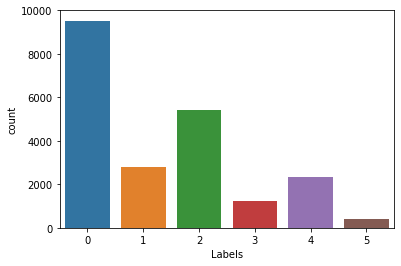

In [12]:
sns.countplot(data=final_data,x='Labels')

In [13]:
class ECG_Data(Dataset):
    def __init__(self,dataframe):
        self.data=dataframe
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self,idx):
        path='/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'+self.data['filename_lr'][idx]
        file_audio=wfdb.rdsamp(path)
        data=file_audio
        data_new=np.array(data[0])
        data_new=np.transpose(data_new,(1,0))
        data_final=data_new[7]
        label=self.data['Labels'][idx]
        data_final=torch.Tensor(data_final)
        return data_final,label

In [14]:
ECG_train,ECG_test=train_test_split(final_data,test_size=0.2,random_state=42)
ECG_train=ECG_train.reset_index()
ECG_test=ECG_test.reset_index()
train_dataset=ECG_Data(ECG_train)
train_loader=DataLoader(train_dataset,batch_size=64)
test_dataset=ECG_Data(ECG_test)
test_loader=DataLoader(test_dataset,batch_size=64)

In [15]:
first_batch, _ = next(iter(train_loader))

print(f"Batch shape: {first_batch.shape}")

Batch shape: torch.Size([64, 1000])


In [16]:
class ECGTransformer(nn.Module):
    def __init__(self, input_dim, model_dim=512, nhead=8, num_encoder_layers=3, num_decoder_layers=3, dim_feedforward=2048, dropout=0.1):
        super(ECGTransformer, self).__init__()

        self.model_dim = model_dim
        self.pos_encoder = PositionalEncoding(model_dim, dropout)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_encoder_layers)
        self.decoder = nn.Linear(model_dim, 6)  # 6 is the number of classes
        self.src_mask = None
        self.input_linear = nn.Linear(input_dim, model_dim)  # Adapt input dimension to model dimension
        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.input_linear.bias.data.zero_()
        self.input_linear.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src):
        src = self.input_linear(src)  
        src = self.pos_encoder(src)   
        output = self.transformer_encoder(src)  
        output = self.decoder(output.mean(dim=1)) 
        return F.log_softmax(output, dim=-1) 

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [17]:
# input_dim = 1
# model_dim = 512  
# model = ECGTransformer(input_dim=input_dim, model_dim=model_dim)

# optim = torch.optim.Adam(params=model.parameters(), lr=0.001)
# loss = torch.nn.CrossEntropyLoss()


# from sklearn.metrics import accuracy_score
# def acc(op, labels):
#     op = torch.softmax(op, dim=1)
#     op = torch.detach(op).numpy()
#     op = np.argmax(op, axis=1)
#     acc = accuracy_score(op, labels)
#     return acc

# num_min_batches = 0
# for index in range(10):
#     for idx, data in enumerate(train_loader):
#         signal, label = data
#         signal = signal.unsqueeze(-1)  
#         optim.zero_grad()
#         output = model(signal)
#         loss_ = loss(output, label)
#         loss_.backward()
#         optim.step()
#         num_min_batches += 1
#         acc_score = acc(output, label)
#         print('Epoch : {}/{} Mini Batch: {} Accuracy : {}'.format(index + 1, 10, num_min_batches + 1, acc_score), end="\r")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

model = ECGTransformer(input_dim=1, model_dim=512).to(device)

optim = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

def acc(op, labels):
    op = torch.softmax(op, dim=1)
    _, preds = torch.max(op, dim=1)
    return (preds == labels).float().mean()

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_accuracy = []
    train_loss_sum = 0
    for data, label in train_loader:
        data, label = data.to(device), label.to(device)
        data = data.unsqueeze(-1)  

        optim.zero_grad()
        output = model(data)
        loss_value = loss_fn(output, label)
        loss_value.backward()
        optim.step()

        train_loss_sum += loss_value.item()
        train_accuracy.append(acc(output, label).item())

    avg_train_accuracy = np.mean(train_accuracy)
    avg_train_loss = train_loss_sum / len(train_loader)
    print(f'Epoch: {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Training Accuracy: {avg_train_accuracy:.2f}%')

    model.eval()
    test_accuracy = []
    test_loss_sum = 0
    with torch.no_grad():
        for data, label in test_loader:
            data, label = data.to(device), label.to(device)
            data = data.unsqueeze(-1)

            output = model(data)
            loss_value = loss_fn(output, label)

            test_loss_sum += loss_value.item()
            test_accuracy.append(acc(output, label).item())

    avg_test_accuracy = np.mean(test_accuracy)
    avg_test_loss = test_loss_sum / len(test_loader)
    print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_accuracy:.2f}%')


Using cuda device
Epoch: 1/10, Training Loss: 1.7385, Training Accuracy: 0.42%
Test Loss: 1.5194, Test Accuracy: 0.43%
Epoch: 2/10, Training Loss: 1.4728, Training Accuracy: 0.43%
Test Loss: 1.5107, Test Accuracy: 0.43%
Epoch: 3/10, Training Loss: 1.4686, Training Accuracy: 0.44%
Test Loss: 1.4988, Test Accuracy: 0.43%
Epoch: 4/10, Training Loss: 1.4658, Training Accuracy: 0.44%
Test Loss: 1.4889, Test Accuracy: 0.43%
Epoch: 5/10, Training Loss: 1.4632, Training Accuracy: 0.44%
Test Loss: 1.4817, Test Accuracy: 0.43%
Epoch: 6/10, Training Loss: 1.4610, Training Accuracy: 0.44%
Test Loss: 1.4781, Test Accuracy: 0.43%
Epoch: 7/10, Training Loss: 1.4596, Training Accuracy: 0.44%
Test Loss: 1.4771, Test Accuracy: 0.43%
Epoch: 8/10, Training Loss: 1.4587, Training Accuracy: 0.44%
Test Loss: 1.4768, Test Accuracy: 0.43%
Epoch: 9/10, Training Loss: 1.4574, Training Accuracy: 0.44%
Test Loss: 1.4767, Test Accuracy: 0.43%
Epoch: 10/10, Training Loss: 1.4563, Training Accuracy: 0.44%
